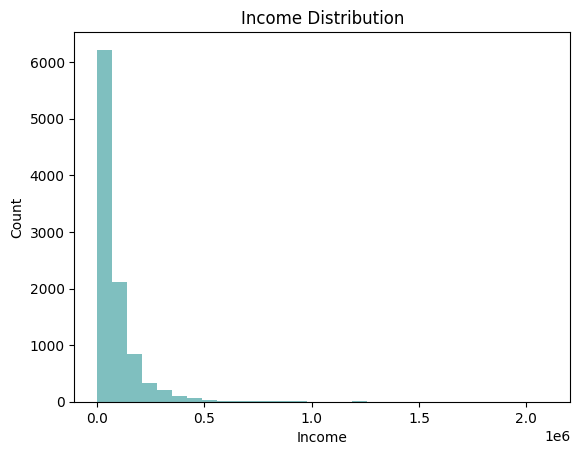

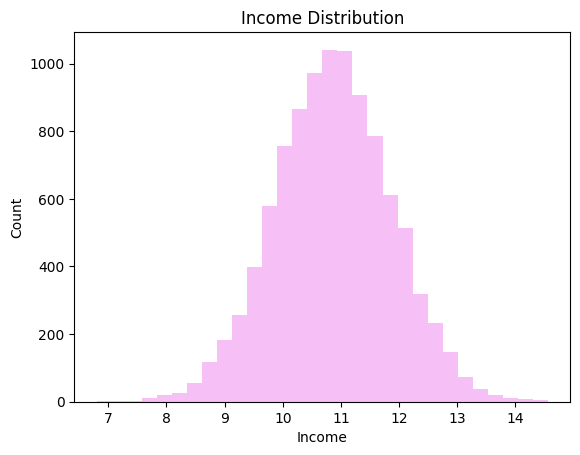

race
asian       818.565036
black       648.428084
hispanic    824.617968
other       751.173088
white       757.135785
Name: spend, dtype: float64
sex
female    756.432118
male      757.865659
other     530.667378
Name: spend, dtype: float64
hispanic_men
0    747.726798
1    889.345394
Name: spend, dtype: float64
black_women
0    768.759455
1    559.651240
Name: spend, dtype: float64
Asian_Woman_HigherEducation
0.0    752.216441
1.0    890.865899
Name: spend, dtype: float64
White_Women
0    749.412371
1    775.133459
Name: spend, dtype: float64
Other_Women
0    756.248670
1    766.423549
Name: spend, dtype: float64
Hispanic_Women
0    756.166626
1    766.046736
Name: spend, dtype: float64
Black_Women
0    756.166626
1    766.046736
Name: spend, dtype: float64
Women
0    757.308686
1    756.432118
Name: spend, dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  spend   R-squared:                       0.523
Model

In [1]:
# Nedim Hodzic

# Lab 07: T54-574

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from statsmodels.formula.api import ols

# We’ll be using the customer.csv data set for this lab. The data set covers the demographic
# characteristics of some customers and the amount they spent over the past year at an online retailer.
df1 = pd.read_csv('/Users/nedim/Downloads/lab07_customers.csv')
# print(df1)
# df1.describe()

# 1. Transform Income so that it looks more normal
plt.hist(df1['income'], bins=30, alpha=0.5, color='teal')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()
# The plotted distribution is not normal, see below for transformation.
# To transform income, we'll take the natural log of this variable
df1['income'] = np.log(df1['income'])
plt.hist(df1['income'], bins=30, alpha=0.5, color='violet')
plt.title("Income Distribution")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# 2. Compute average spending by race
# source: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html
print(df1.groupby('race')['spend'].mean())
# asian       818.565036
# black       648.428084
# hispanic    824.617968
# other       751.173088
# white       757.135785

# 3. Compute average spending by sex
# source: https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.mean.html
print(df1.groupby('sex')['spend'].mean())
# female    756.432118
# male      757.865659
# other     530.667378

# 4. We have reason to believe that groups of Hispanic Men and Black Women spend differently
# from other groups, and from each other. Hint you may want to dummy code the variables to
# make interpretation easier.
# source: https://www.sharpsightlabs.com/blog/pandas-get-dummies/
df2 = pd.get_dummies(df1)
# print(df2)
df2['hispanic_men'] = df2['race_hispanic'] * df2['sex_male']
df2['black_women'] = df2['race_black'] * df2['sex_female']
# print(df2)
print(df2.groupby('hispanic_men')['spend'].mean())
print(df2.groupby('black_women')['spend'].mean())

# hispanic_men
# 0    747.726798
# 1    889.345394

# black_women
# 0    768.759455
# 1    559.651240

# As shown above, we can confirm that spending habits differ between black women and hispanic men

# 5. We also believe that Asian Women with Higher education are great customers (spend more).
# Creating test dummy variable
df2['Asian_Woman_HigherEducation'] = df2['race_asian'] * df2['sex_female'] * df2['schoolYears']
# Creating other dummy variables to compare Asian_Women_HigherEducation against
df2['Asian_Women'] = df2['race_asian'] * df2['sex_female']
df2['White_Women'] = df2['race_white'] * df2['sex_female']
df2['Other_Women'] = df2['race_other'] * df2['sex_female']
df2['Hispanic_Women'] = df2['race_hispanic'] * df2['sex_female']
df2['Black_Women'] = df2['race_hispanic'] * df2['sex_female']
df2['Women'] = df2['sex_female']
#print(df2)
print(df2.groupby('Asian_Woman_HigherEducation')['spend'].mean())
print(df2.groupby('White_Women')['spend'].mean())
print(df2.groupby('Other_Women')['spend'].mean())
print(df2.groupby('Hispanic_Women')['spend'].mean())
print(df2.groupby('Black_Women')['spend'].mean())
print(df2.groupby('Women')['spend'].mean())

# Asian_Woman_HigherEducation
# 0.0    752.216441
# 1.0    890.865899
# White_Women
# 0    749.412371
# 1    775.133459
# Other_Women
# 0    756.248670
# 1    766.423549
# Hispanic_Women
# 0    756.166626
# 1    766.046736
# Black_Women
# 0    756.166626
# 1    766.046736
# Women
# 0    757.308686
# 1    756.43211

# Yes, they do spend more. This is evident in the spend of 890 which ranks highest compared to other race/sex combinations

# 6. Fit a model to test the hypotheses in steps 4 and 5, report parameter estimates and R2
lm_1 = ols('spend ~ black_women + hispanic_men', data=df2).fit()
# print(lm_1.summary())
# R^2 = 0.249

# See printed OLS Regression results for estimates
lm_2 = ols('spend ~ Asian_Woman_HigherEducation', data=df2).fit()
# print(lm_2.summary())
# R^2 = 0.046

# Since both R-squared values are less than 0.5 we cannot say with confidence that the hypothesis is true
# i.e. we cannot say that the given categories have high impact on spending habits for reach group
# This applies to steps 4 and 5

# See printed OLS Regression results for estimates

# 7. Of course income, and age probably play a factor in spending, so let’s include those, report
# parameter estimates and R2

lm_3 = ols('spend ~ black_women + hispanic_men + income + age', data=df2).fit()
print(lm_3.summary())
# R^2 = 0.523
# See printed OLS Regression results for estimates

lm_4 = ols('spend ~ Asian_Woman_HigherEducation + income + age', data=df2).fit()
print(lm_4.summary())
# R^2 = 0.154
# See printed OLS Regression results for estimates

# Combining the 2 sets
lm_5 = ols('spend ~ age+ income + black_women + race_black + sex_female + hispanic_men + race_hispanic + sex_male/'
           '+ Asian_Woman_HigherEducation + race_asian + sex_female + schoolYears', data=df2).fit()
print(lm_5.summary())
# R^2 = 0.854
# See printed OLS Regression results for estimates

# 8.Describe the findings from your model

# The original model only tested if race/gender/education impact spending
# Meanwhile the finalized models also accounted for age and income
# It was found that by adding age and income we explained much more of the variance in the models.
# For the black_women and hispanic_men model, 52.3% of the variance was explained vs. 24.8% in the original model.
# For Asian_Woman_HigherEducation, 15.4% of the variance was explained vs. 4.6% in the original model.
# The combined model showed an adj. R^2 of 0.854, thus explaining 85.4% of the variance
# We can conclude that age and income are better predictors for spending than race and sex are 